# Tree base model

## Decision Tree(CART : Classification and Regression Tree)
> **`Decision Tree`** 모델은 **예측/분류가 모두 가능**한 **지도학습** 머신러닝 모델이다.   
스무고개 게임을 하듯 여러 개의 가정을 데이터에 반영하고 이를 바탕으로 결정경계(decision boundary)를 생성  
모델 예측 및 분류 결과에 따른 해석이 굉장히 용이하여 **모델 해석이 필요한 문제에 사용**한다.ex)신용평가, 모델분류  
선형회귀/다항회귀/로지스틱회귀보다 성능이 좋음   
최근에는 `Decision Tree`모델을 베이스로 한 랜덤포레스트, 부스팅 트리 모델(**`Xgboost`**, **`LightGBM`**, **`Catboost`**)등으로 데이터분석 대회 수상을 하면서 실무 적용 케이스가 많아졌다.

### 모델구조
> 뿌리 노드(root node) : 최상위 노드, 모든 샘플 포함  
잎 노드(leaf node) : 최하위 노드, 여기에 속한 샘플이 어떤 클래스인지 결정 됨  
노드(node) : 뿌리 노드와 잎 노드 사이에 있는 노드  
가지(branch) : 노드를 나누는 기준  
깊이(depth) : 뿌리 노드와 잎 노드 까지의 노드 갯수 (깊이가 깊을수록 모델이 복잡해짐)

ex) 분류모델, depth = 2 <img src="https://drive.google.com/uc?id=1gTRvBWaKpbR5VI9Iv1_OlwKg4YQGPxXr">

### 모델학습 - 분류
#### 불순도
> `Decision Tree` 모델을 학습시키는 방법  
정보화 이론에서 사용하는 Gini 계수와 엔트로피를 사용한다.  
불순도가 0.5에 가까수록 불순도가 높고 0 혹은 1에 가까울 수록 순도가 높다.  
즉, 한 노드의 불순도가 가능한 많이 떨어지도록(순도가 올라가도록) 노드를 나눈다.

$$ Gini = 1 - \sum_1^n{(p_i)^2} $$

$$ Entropy = - \sum_1^n{p_iln(p_i)} $$

#### Gini index
위 예시에서 뿌리 노드 기준 지니계수 계산법  
class1 : 삼각형  
class2 : 동그라미  
>X < 0
>> True = class1 3개, class2 4개  
$1 - ({3 \over 3+4})^2 - ({4 \over 3+4})^2 = 0.48$  
False = class1 4개, class2 3개  
$1 - ({4 \over 4+3})^2 - ({3 \over 4+3})^2 = 0.48$  
total Gini 계수(가중치 넣은 지니계수 평균값)  
$1 - ({7 \over 7+7})0.48 - ({7 \over 7+7})0.48 = 0.52$

위 예시에서 잎 노드 기준 지니계수 계산법  
class1 : 삼각형  
class2 : 동그라미  
>Y < 1
>> True = class1 3개, class2 0개  
$1 - ({3 \over 3})^2 - ({0 \over 3})^2 = 0$  
False = class1 0개, class2 4개  
$1 - ({0 \over 4})^2 - ({4 \over 4})^2 = 0$  
total Gini 계수(가중치 넣은 지니계수 평균값)   
$1 - ({3 \over 3+4})0 - ({4 \over 3+4})0 = 1$

잎 노드의 순도가 높아질 때까지 분리함,, 너무 과하면 과적합

위의 예시에서 계산한 total Gini 계수가 곧 Decision tree 모델의 비용함수가 된다.  
이를 바탕으로 더 나은 선택을 하게 되는 결정경계를 생성하는 방법으로 데이터를 학습하는데 이를 greedy 알고리즘이라 한다.

### Decision Tree classifier 실습

In [1]:
# 필요모듈 import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# iris 데이터로드
from sklearn.datasets import load_iris
iris = load_iris()

In [36]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
# 로딩 데이터 확인
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
# 데이터 분할
y = iris['target']
X = iris['data']
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [22]:
pd.DataFrame(X, columns=iris['feature_names']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [12]:
# 학습데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [13]:
# 모델 import
from sklearn.tree import DecisionTreeClassifier

In [68]:
# 모델 생성
dtc = DecisionTreeClassifier(random_state=42, max_depth=2)

In [69]:
# 모델 학습
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [70]:
# 모델평가
dtc_pred = dtc.predict(X_test)

[[12  0  0]
 [ 0 12  1]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.92      0.92        13
           2       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [71]:
# test셋 분류 결과 확인
dtc.predict(X_test)

array([0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       1, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1])

In [72]:
# 모델 평가지표 출력
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, dtc_pred))
print(classification_report(y_test, dtc_pred, target_names=iris['target_names']))

[[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



### 모델 해석을 위한 시각화 방법
#### feature importance
트리 기반 모델은 트리를 분기하는 과정에서 어떤 변수가 모델을 학습하는데 중요한지 살펴볼 수 있다.

In [73]:
# feature importance 시각화
dtc.feature_importances_
# 높을수록 node 구분 기준에 많이 사용된 변수

array([0., 0., 1., 0.])

<BarContainer object of 4 artists>

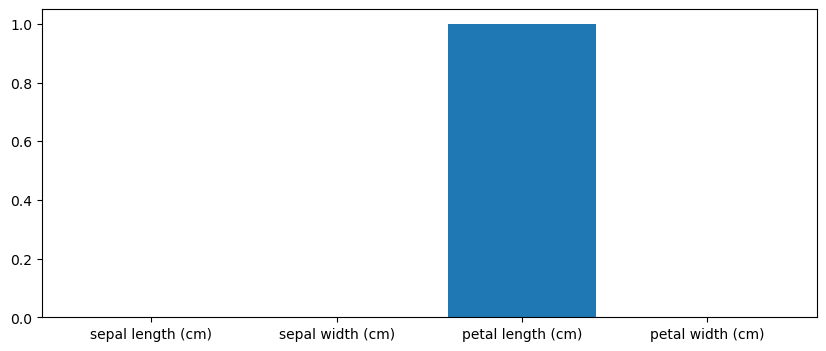

In [74]:
plt.figure(figsize=(10,4))
plt.bar(iris['feature_names'], dtc.feature_importances_)

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

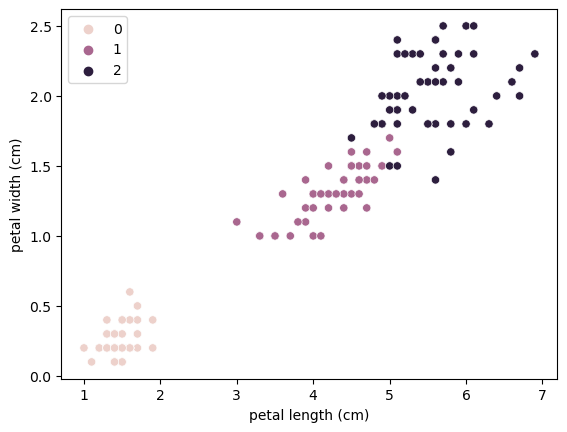

In [75]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame(X, columns=iris['feature_names'])
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue=y)   # hue로 색깔 구분(legend)

#### model plotting

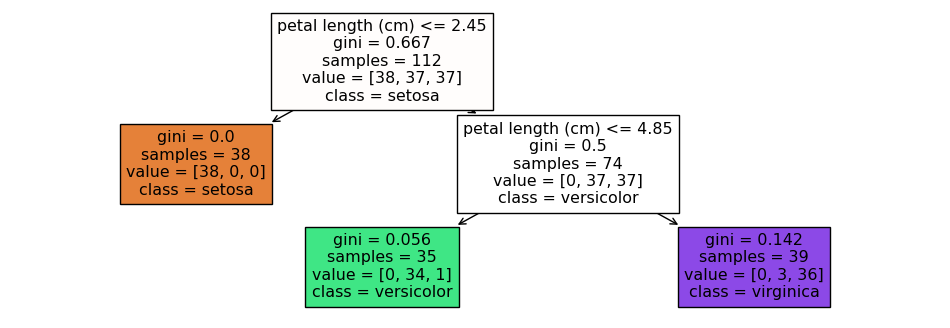

In [78]:
# 모델 시각화 - 복잡도 제어 없이 쭉 모델 학습해서 결과 구조 시각화해보고 얼만큼 가지치기할지 판단하기
from sklearn.tree import plot_tree
plt.figure(figsize=(12,4))
plot_tree(dtc, 
          feature_names=iris['feature_names'], 
          class_names=iris['target_names'],
          filled=True);                          # 끝에 ; 세미콜론 찍어주면 중간에 텍스트 가려줌

### 가지치기 (pruning)
>`Decision Tree`모델은 모든 **잎 노드의 불순도가 0이 되는 순간까지 모델을 성장**시키면서 크기를 키워나간다.  
순수 노드로만 이루어진 트리 모델은 훈련 데이터를 100% 정확도로 맞출 수 있다.  
이러한 특성 때문에 트리 모델은 **과적합에 취약**하다.  
과적합 방지를 위해서는 **트리의 복잡도를 제어** 할 필요가 있다.

>과적합 방지를 위한 모델링 파라메터  
>> - **`max_depth`** : 트리의 최대 깊이  
- `max_leaf_nodes` : 잎 노드의 최대개수  
- `min_sample_leaf` : 잎 노드가 되기 위한 최소 샘플 갯수  
- `min_sample_split` : 잎 노드가 분지 되기 위한 최소 샘플 갯수

위의 iris 데이터는 3개의 클래스로 이루어진 데이터셋이지만 모델플로팅 결과 2뎁스의 노드에서 어느정도 데이터 구분이 되었습니다.  
이를 기준으로 사후 가지치기를 진행 해 보겠습니다.

## Decision tree regressor
> `Decision Tree`모델은 알고리즘 특성으로 분류 및 예측 모델링에 모두 사용이 가능하다.  
일반적으로 잎 노드에 속한 학습샘플의 값의 평균을 바탕으로 예측값을 결정한다.  
회귀모델 평가 방법인 MSE를 각 노드에 속한 샘플에 적용하고 이를 최소화 시킨다.  

<img src="https://drive.google.com/uc?id=1VNT8MulVBhqDLj0tVTRrf8s-8EIv5RZP">
<img src="https://drive.google.com/uc?id=1ICIKUdPHbx9ZkBSKzOgl7248QaIQrq2U">

### Decision tree regressor 실습

In [83]:
# 보스턴 집값 데이터 로딩
import pandas as pd
df = pd.read_csv('./data/boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  y        506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [88]:
# 타겟 데이터 분할
y = df['y']
X = df.drop(columns='y')
# X = df.drop('y', axis=1)

In [90]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [91]:
# 테스트 데이터 분할 (stratify는 분류문제에서 사용)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [92]:
# 모델 import
from sklearn.tree import DecisionTreeRegressor

In [109]:
# 모델 생성
dtr = DecisionTreeRegressor(random_state=1234)

In [110]:
# 모델 학습
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1234)

In [111]:
# 모델 예측
dtr_pred = dtr.predict(X_test)

In [112]:
dtr.predict(X_test)

array([18.5, 33.1, 15.2, 24.1, 17.7, 21. , 19.1, 16.7, 21.6, 21.2, 18.3,
       19.5,  8.5, 21. , 16.2, 25. , 20.5,  7.2, 50. , 13. , 22.6, 22.6,
       15.4, 22. , 17.4, 14.5, 22.7, 14.1, 16.7, 24.5, 19.5, 23.1, 10.4,
       19.9, 13.5, 15.6, 33.4, 19. , 21.7, 24.8, 19.8, 30.1, 50. , 22.8,
       22. , 16.2, 15.4, 24.1, 19.1, 32.5, 22.9, 36.1, 16.6, 30.1, 43.1,
       22.2, 18.1, 28. , 22. , 22.5, 24.5, 33. , 29.8, 18.2, 22.8, 14.3,
       13. , 23.2, 27.9, 19. , 22.6, 28.7,  8.3, 22.9, 28.1,  5.6, 20.4,
       44. , 10.2,  8.1, 22. , 10.2, 17.1,  7.2, 20.3, 28.4, 14.1, 23.1,
       28.7, 18. , 22.6,  8.5, 19.2, 17.5, 24.3, 18.4, 50. , 10.2, 14.1,
       10.2, 17.5, 28.1, 10.2, 20.4, 17.1, 19. , 19.2, 23. , 20.6, 28.7,
        7.2, 16.3, 22.9, 29.6, 28.7, 14.9, 50. , 14.8, 19.3, 22.5, 22.8,
       24.1,  8.5, 21.2, 24.1, 23.1, 28.7])

In [116]:
# 모델 평가지표 출력
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(f'dtr r2 score : {r2_score(y_test, dtr_pred)}')
print(f'dtr rmse : {mean_squared_error(y_test, dtr_pred, squared=False)}')
print(f'dtr mae : {mean_absolute_error(y_test, dtr_pred)}')

dtr r2 score : 0.8313061337383855
dtr rmse : 3.437026273728383
dtr mae : 2.5929133858267717


In [114]:
# feature importance
dtr.feature_importances_

array([5.79649925e-02, 1.81468173e-03, 1.28559185e-02, 3.80717593e-04,
       6.64837210e-03, 5.90104023e-01, 1.45934188e-02, 7.32446991e-02,
       1.55912271e-03, 5.77380038e-03, 2.48387906e-02, 9.89758440e-03,
       2.00323879e-01])

<BarContainer object of 13 artists>

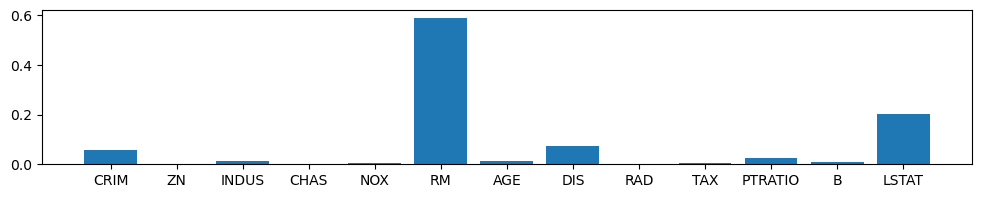

In [115]:
plt.figure(figsize=(12,2))
plt.bar(X.columns, dtr.feature_importances_)

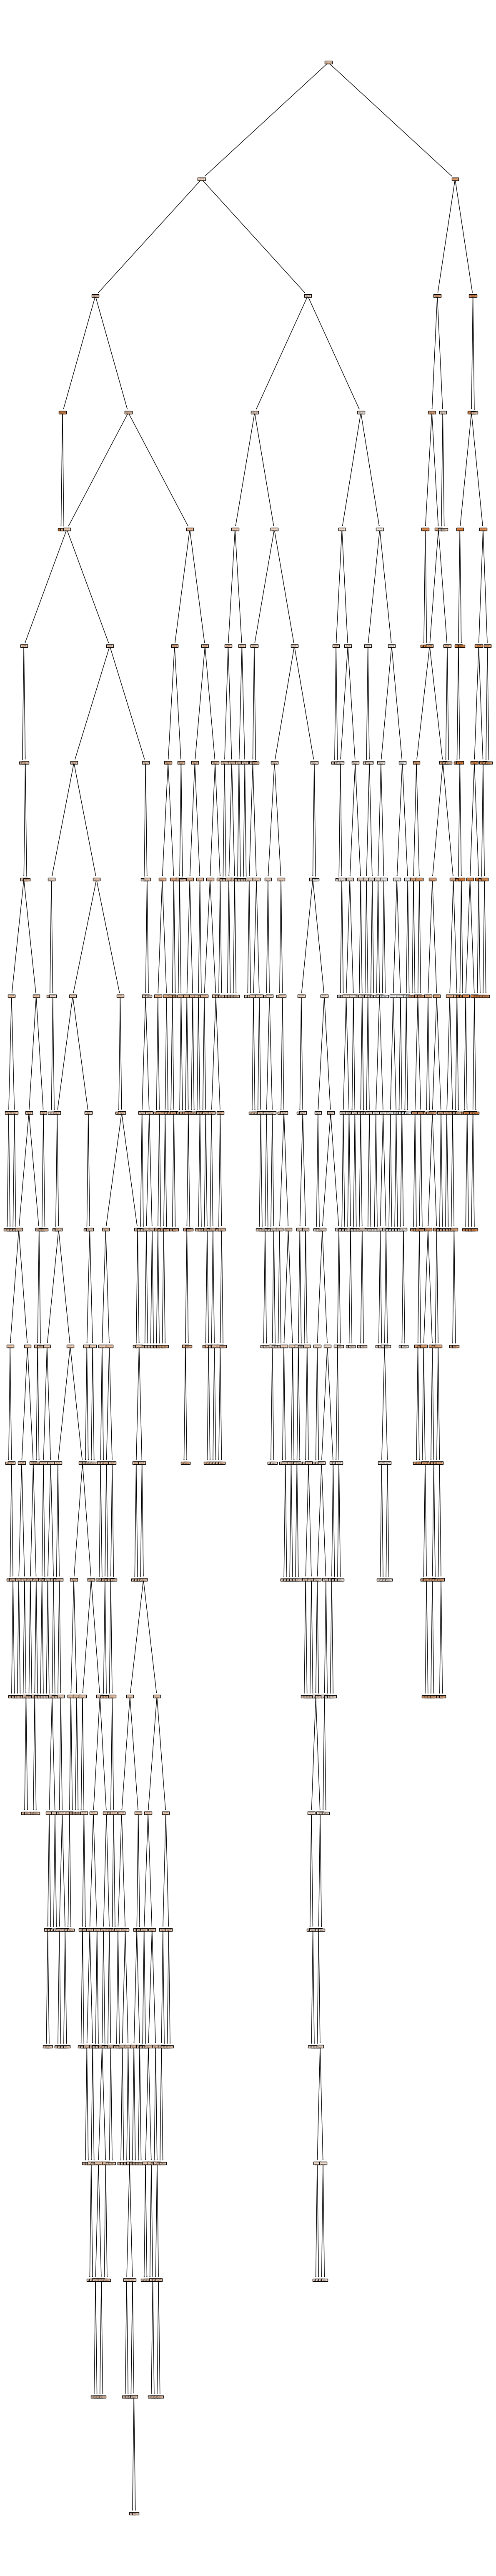

In [119]:
plt.figure(figsize=(15,80))
plot_tree(dtr,
         filled=True);
plt.savefig('plot.png', dpi=600)

## Random Forest
>**`Random forest`** 는 **`Decision Tree`** 모델의 **모형 결합(ensemble)방법론**  

### ensemble(앙상블)
> **복수의 예측 모형을 결합**하여 더 나은 성능의 예측을 하려는 시도이다.  
단일 모형을 사용할 때 보다 **성능 분산이 감소**하고, 즉 **과적합을 방지**한다.  
개별 모형이 성능이 안좋을 경우에는 결합 모형의 성능이 더 향상된다.  
앙상블 방법론에는 **배깅**, **부스팅**이 있다. (+stacking, 성능을 0.01이라도 올릴때 사용)

<img src="https://drive.google.com/uc?id=1JJVUyYwHD2ddpigy0D3mG5KFLc5Yq1qR">
결과값이 여러 개일 경우, 분류: voting (다수결) / 예측: 평균값

#### bagging(배깅)
> 개별 모델을 병렬로 구성하여 모델을 결합하는 방법론이다.  
기존 학습데이터에서 **복원 추출**로 여러개의 sub sample 데이터셋을 만든 후 각 데이터셋을 병렬 구성 모델에 학습시켜 서로 다른 결과를 얻는다.(중복된 데이터가 들어갈 수 있음, 각 sub sample data를 병렬로 따로 학습시켜)  
개별 모델의 결과값을 voting(투표법) 혹은 평균법을 사용하여 개별 모델 결과를 바탕으로 최종 추정치를 얻는다.  

<img src="https://drive.google.com/uc?id=1CMsFhLTApJqrOlGdqVE4qWH89j04w_xF">

#### Random Forest Bootstrap Aggregating
> **`Random forest`** 는 대표적인 배깅 방법론으로 weak model로 **`Decision Tree`** 를 사용한다.  
배깅 사용 시 추가적으로 부트스트랩 방법론을 추가하여 모델 학습에 사용한다.   
(부트스트랩 : 변수 선택에도 랜덤성 부여. weak model마다 변수 개수/종류 다를 수 있음)  
부트스트랩은 복원 추출 된 sub sample 데이터셋 생성 시 랜덤 샘플 및 feature를 선택하여 모델 학습에 사용한다.

<img src="https://drive.google.com/uc?id=1MfkxFwIsQJgjT_VD_CFl_fM3WJfc_3BG">

### Ramdom Forest 실습

In [120]:
# 모델 import
from sklearn.ensemble import RandomForestRegressor

### 과적합 방지를 위한 모델링 파라메터  
> 1. **n_estimators** : 사용 할 트리 모델 개수  
2. **max_depth** : 트리의 최대 깊이 (random forest에 들어가는 모든 decision tree의 max_depth를 동시에 제어)

두 파라미터의 최적 조합을 찾아야해

In [121]:
# 모델 생성
rfr = RandomForestRegressor()

In [122]:
# 모델 학습
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [126]:
# 모델 예측
rfr_pred = rfr.predict(X_test)  # 결과값이 비슷한 range인지 값 확인하기

In [125]:
# 평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(f'rfr r2 score : {r2_score(y_test, rfr_pred)}')
print(f'rfr rmse : {mean_squared_error(y_test, rfr_pred, squared=False)}')
print(f'rfr mae : {mean_absolute_error(y_test, rfr_pred)}')

rfr r2 score : 0.8571856517343832
rfr rmse : 3.1624169367573534
rfr mae : 2.131370078740156


## Boosting Tree
> 배깅과 부스팅의 차이점은 학습을 위해 사용하는 개별모델을 병렬/직렬로 구성함에 있다.  
배깅의 경우 sub sample에 따라 개별 모델을 모두 학습시키고 결과를 투표 혹은 평균을 내어 예측한다면  
부스팅은 **개별 모델의 학습을 순차적**으로 시키며 이전 개별 모델의 결과 중 **오분류 된 데이터 혹은 오차에 가중치 부여**  
(틀린 모델에 가중치 부여)  
초기에는 동일 가중치를 갖지만 각 학습 과정을 거치며 복원 추출 시 가중치의 분포/이전 round의 오차를 고려  

>> 해당모델에는 `Adaboost`, `GBM`, `Xgboost`(과적합 해결), `lightGBM`(bigdata 가볍게), `catboost`(카테고리 데이터도)가 있다.

### bagging 과 boosting
<img src="https://drive.google.com/uc?id=1rhB9YkRkKILRb0GqOfa99K-EQ7CEcrPc">

### Adaptive booting(Adaboost)
> a -> f 순서로 학습이 진행 되고 있다. 각 학습 단계(round)에서 **오분류 된 데이터에 가중치를 부여**하고  
다음 라운드에서 가중치가 부여 된 데이터를 잘 맞추기 위한 개별모델이 학습 된다.  
최종 모델은 개별 모델의 결과가 합쳐져서 최종 모델링이 된다.

<img src="https://drive.google.com/uc?id=1VKmbttZT4aPOAaYuqhw2os7nFMOs6MMJ">

### gradient boost
이전 round 모델의 데이터별 오류를 학습하는 모델을 사용하여 점진적으로 총 모델링 오차를 줄이는 부스팅 방법   
**이전 모델의 오차를 다음 모델의 학습 데이터에 포함**시켜 스무딩 효과   
예측력이 좋기 때문에 과적합 가능성이 높음 → 이를 개선한 것이 **xgboost**

$$y = h_0(x) + error_0 $$
$$error_0 = h_1(x) + error_1 $$
$$error_1 = h_2(x) + error_2 $$
$$\vdots$$
$$y = h_0(x) + h_1(x) + h_2(x) + \cdots + small error $$

<img src="https://drive.google.com/uc?id=1Ty-CEINGgXuHtghd0GuDsxO1CfWahDYB">

## xgboost
> 머신러닝 알고리즘 대회인 kaggle, KDD cup등에서 우승을 한 팀들이 xgboost를 많이 활용한 것이 알려지면서 주목받음.  
boosting 모델에서 오류를 학습하여 다음 round에 반영시키는 것은 gadient boosting과 큰 차이가 없음.  
다만, **학습을 위한 비용함수에 규제화 식이 추가**되어 모델이 과적합 되는 것을 방지함.  
규제화를 통해 복잡한 모델에 패널티를 부여  

$$obj^{(t)} = \sum_1^{n} l(y_i, \hat{y}_i^{(t)}) + \sum_{i=1}^t \Omega(f_i) $$


In [157]:
# 모델 설치
!pip install xgboost
# 앞에 ! 붙이면 commander에서 하는거 됨

     ---------------------------------------- 89.1/89.1 MB 5.2 MB/s eta 0:00:00


In [2]:
# 모델 import
from xgboost import XGBClassifier, XGBRegressor, XGBRFClassifier  # XGBRFClassifier: weak model을 randomforest로, 시간 오래 걸림

In [3]:
# 보스턴 데이터 로드
import pandas as pd
df = pd.read_csv('./data/boston.csv')

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# 타겟 데이터 분할
y = df['y']
X = df.drop('y', axis=1)
# 테스트셋 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# 모델 생성
xgbr = XGBRegressor()
'''
모델이 복잡할수록 시간이 오래걸리고 파라미터에 따라 성능차이가 크다

< xbgoost 주요 파라메터 >

모델 파라메터 ((큰그림))
verbosity : round 출력결과 0=무음, 1=경고, 2=정보, 3=디버그
n_jobs : 병렬쓰레드 구성, 최대값 : 로컬컴퓨터 코어 x 4 (4개는 남겨두고 쓰기)
gpu_id : GPU 연산 처리 디바이스 설정 (GPU 쓰면 훨씬 빨라져)
random_state : 랜덤시드
missing : 결측치 처리 np.nan을 디폴트로 사용 (결측치를 평균값으로 대체해 학습에 사용)

트리 파라메터 ((weak classifier/regressor의 파라미터))
max_depth : 트리모델 최대 깊이 (분류모델: depth를 작게, round를 늘려서) (*써칭필요* 늘려줄수록 model 성능은 향상하지만 과적합에 취약함)
max_leaves : 트리모델 최대 잎 노드 갯수, 0=무제한 지정
grow_policy : 트리확장 방법 0=노드와 가장 가까운 노드 분할, 1=손실함수가 최소가 되는 지점에서 분할
gamma : 트리모델의 잎 노드 분할을 만드는 데 필요한 최소 손실 감소. (감마 클수록 round를 길게 가져갈수있음)
min_child_weight : 관측치에 대한 최소 가중치 값 
subsample : 부트스트랩 샘플 비율 (0~1, 설정 필요)
colsample_bytree : 부트스트랩 컬럼 비율 (0~1, 설정 필요)
reg_alpha : L1, lasso, 0  (elastic net : L1,L2 둘다 적용한 것)
reg_lambda : L2, ridge, 1

부스팅 파라메터
n_estimators : 부스팅 트리 갯수, round 횟수와 같은 수 (*써칭필요* 늘려줄수록 model 성능은 향상하지만 과적합에 취약함)
learning_rate : round별 학습률 (딥러닝 개념,,)
booster: 부스팅 트리 모델 선택
    gbtree
    gblinear
objective : 목적함수 (종속변수 y의 분포에 따라 설정)
    reg : squarederror
    binary : logistic
    multi : softmax (딥러닝 개념)
    multi : softprob
eval_metric : 모델평가함수, 목적함수에 따라 지정되어 있음
    rmse: root mean square error
    error: Binary classification error rate (0.5 threshold)
    merror: Multiclass classification error rate
early_stopping_rounds : 학습 손실값 변동 없을 시 학습 종료 라운드 횟수 설정 
callbacks : 학습 중 설정 값 전달 API (딥러닝 개념)
'''

'\nxbgoost 주요 파라메터\n\n모델 파라메터\nverbosity : round 출력결과 0=무음, 1=경고, 2=정보, 3=디버그\nn_jobs : 병렬쓰레드 구성, 로컬컴퓨터 코어 x 4 최대값\ngpu_id : GPU 연산 처리 디바이스 설정\nrandom_state : 랜덤시드\nmissing : 결측치 처리 np.nan을 디폴트로 사용\n\n트리 파라메터\nmax_depth : 트리모델 최대 깊이\nmax_leaves : 트리모델 최대 잎 노드 갯수, 0=무제한 지정\ngrow_policy : 트리확장 방법 0=노드와 가장 가까운 노드 분할, 1=손실함수가 최소가 되는 지점에서 분할\ngamma : 트리모델의 잎 노드 분할을 만드는 데 필요한 최소 손실 감소.\nmin_child_weight : 관측치에 대한 최소 가중치 값\nsubsample : 부트스트랩 샘플 비율\ncolsample_bytree : 부트스트랩 컬럼 비율\nreg_alpha : L1, lasso, 0\nreg_lambda : L2, ridge, 1\n\n부스팅 파라메터\nn_estimators : 부스팅 트리 갯수, round 횟수와 같은 수\nlearning_rate : round별 학습률\nbooster: 부스팅 트리 모델 선택\n    gbtree\n    gblinear\nobjective : 목적함수 \n    reg : squarederror\n    binary : logistic\n    multi : softmax\n    multi : softprob\neval_metric : 모델평가함수, 목적함수에 따라 지정되어 있음\n    rmse: root mean square error\n    error: Binary classification error rate (0.5 threshold)\n    merror: Multiclass classification error rate\nearly_stopping_rounds : 학습 손실값 변동 없을 시 학습 종료

**써칭 필수 파라미터**
max_depth = [3, 5, 7, 9] : 트리모델 최대 깊이 (늘려줄수록 model 성능은 향상하지만 과적합에 취약함)  
subsample = [0.6, 0.7, 0.8] : 부트스트랩 샘플 비율 (0~1, 설정 필요)  
colsample_bytree = [0.6, 0.7, 0.8] : 부트스트랩 컬럼 비율 (0~1, 설정 필요)  
n_estimators = [100, 300, 500, 700, 1000, 2000] : 부스팅 트리 갯수, round 횟수와 같은 수 (늘려줄수록 과적합에 취약함)  
learning_rate = [0.003, 0.03, 0.09] : round별 학습률 (딥러닝 개념,,)  

<설명변수가 많을 때 - 많을수록 늘려가>  
reg_alpha = [1, 3, 5, 7] : L1, lasso, 0  (elastic net : L1,L2 둘다 적용한 것)  
reg_lambda = [1, 3, 5, 7] : L2, ridge, 1  

In [7]:
# 모델 학습
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [9]:
# 모델 예측
xgbr_pred = xgbr.predict(X_test)

In [11]:
# 평가지표 출력
from sklearn.metrics import r2_score, mean_squared_error
print(f'XGBR R2 score : {r2_score(y_test, xgbr_pred)}')
print(f'XGBR RMSE : {mean_squared_error(y_test, xgbr_pred, squared=False)}')

XGBR R2 score : 0.8563261418953055
XGBR RMSE : 3.1719189619003716


In [12]:
# 변수 중요도 출력
xgbr.feature_importances_

array([0.01426179, 0.00154783, 0.01252463, 0.00174187, 0.06403027,
       0.17991483, 0.01409075, 0.06171717, 0.01227683, 0.02006842,
       0.0282895 , 0.01044191, 0.57909423], dtype=float32)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

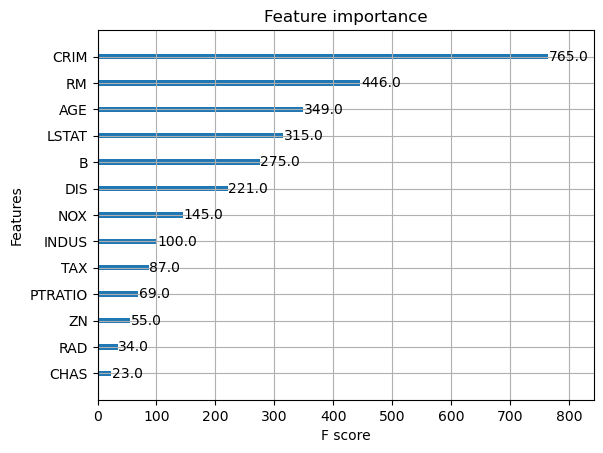

In [14]:
from xgboost import plot_importance, plot_tree
plot_importance(xgbr)

<BarContainer object of 13 artists>

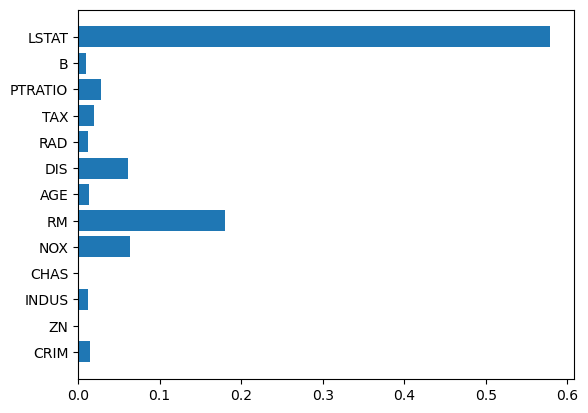

In [13]:
import matplotlib.pyplot as plt
plt.barh(X.columns, xgbr.feature_importances_)

## 파라메터 서칭
tree base 모델은 설정 가능한 파라메터의 조합에 따라 모델 예측력 차이가 큰 특징을 가지고 있습니다.  
특히, Xgboost 모델의 경우 파라메터 설정에 따른 모델 예측력 차이가 굉장히 크기에 꼭 파라메터 서칭을 진행해주셔야 합니다.  
간단한 문법을 통해 파라메터 서칭을 진행 해보겠습니다.

In [127]:
from itertools import product

In [142]:
# product 함수로 파라메터의 모든 조합 만들기 (곱의 조합)
est = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]    # 보통 100단위
depth = [3, 5, 7, 9, 11]               # 보통 홀수 기준
grid = list(product(est, depth))

In [143]:
# Validation (최적의 parameter 조합을 찾기 위한 평가, train data를 또 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [149]:
# 위 파라메터 조합을 반복문으로 순환하며 파라메터 서칭
best_param = None
best_r2 = -999999999  # 최대값을 찾기 위한 변수 초기화
for param in grid:      # param : tuple 타입
#     print(f'{param} 서칭중')
    model = RandomForestRegressor(n_estimators=param[0], max_depth=param[1], random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = r2_score(y_val, y_pred)
    print(param, best_r2 < score)
    if best_r2 < score:
        best_r2 = score
        best_param = param

(100, 3) True
(100, 5) False
(100, 7) True
(100, 9) True
(100, 11) True
(200, 3) False
(200, 5) False
(200, 7) False
(200, 9) False
(200, 11) False
(300, 3) False
(300, 5) False
(300, 7) True
(300, 9) False
(300, 11) False
(400, 3) False
(400, 5) False
(400, 7) True
(400, 9) False
(400, 11) True
(500, 3) False
(500, 5) False
(500, 7) False
(500, 9) False
(500, 11) False
(600, 3) False
(600, 5) False
(600, 7) False
(600, 9) False
(600, 11) False
(700, 3) False
(700, 5) False
(700, 7) False
(700, 9) False
(700, 11) False
(800, 3) False
(800, 5) False
(800, 7) False
(800, 9) False
(800, 11) False
(900, 3) False
(900, 5) False
(900, 7) True
(900, 9) True
(900, 11) False
(1000, 3) False
(1000, 5) False
(1000, 7) False
(1000, 9) True
(1000, 11) False


In [150]:
# 최적 r2값, 최적 파라메터 확인
print(f'최적 R2 score : {best_r2}')
print(f'최적 Parameter : {best_param}')

최적 R2 score : 0.7105136262340228
최적 Parameter : (1000, 9)


In [146]:
# 최적 모델로 모델 다시 학습 및 평가
best_model = RandomForestRegressor(n_estimators=best_param[0], max_depth=best_param[1])
best_model.fit(X_train, y_train)
best_pred = best_model.predict(X_test)
print(f'best r2 score : {r2_score(y_test, best_pred)}')
print(f'best rmse : {mean_squared_error(y_test, best_pred, squared=False)}')
print(f'best mae : {mean_absolute_error(y_test, best_pred)}')

best r2 score : 0.7536019885160323
best rmse : 4.153859524143605
best mae : 2.518970519982265


In [147]:
best_model = RandomForestRegressor(n_estimators=300, max_depth=9)
best_model.fit(X_train, y_train)
best_pred = best_model.predict(X_test)
print(f'best r2 score : {r2_score(y_test, best_pred)}')
print(f'best rmse : {mean_squared_error(y_test, best_pred, squared=False)}')
print(f'best mae : {mean_absolute_error(y_test, best_pred)}')

best r2 score : 0.7422213836366662
best rmse : 4.248705708692777
best mae : 2.547942741373397


### sklearn GridSearchCV
sklearn 패키지에는 위의 파라메터 서칭 과정을 간편하게 진행 할 수 있도록 GridSearchCV 방법론을 제공합니다.  
기존 파라메터 서칭과 함께 Cross Validation (교차검증) 과정을 추가하여 데이터 분할에 강건한 모델을 선택할 수 있도록 제작 되었습니다.

**k-fold cross validation**  
데이터를 랜덤으로 k개로 분할하여 그 중 하나를 validation set으로, 나머지는 train set으로 사용하여 학습 k회 반복 후 결과값 평균

In [17]:
kospi = pd.read_csv('./data/kospi.csv', encoding='cp949')

In [18]:
kospi.head()

,전경련BSI,주택매매가격,건설BSI(전망),"실업률(계절조정,%)",어음부도율,일별수출액YoY,내국인출국자수YoY,코스피 200 변동성지수,통안채 364일,공사채 AAA 3년,...,재화수출,내수,GDP디플레이터,총저축률,총투자율,Reuter CRB(EW)상품선물지수,Reuter CRB(EW)에너지지수,Reuter CRB(EW)산업지수,Reuter CRB(EW)귀금속지수,코스피지수
0,96.4,70.13,83.3,3.7,0.09,14.50,-37.03,25.50,4.06,4.97,...,1.6,-0.4,3.1,32.8,32.3,243.7,247.7,217.5,322.4,633.4
1,90.3,70.83,86.7,3.7,0.08,10.56,-9.67,20.83,4.24,4.83,...,7.8,-0.4,4.0,33.3,32.3,247.6,255.7,247.3,326.4,669.9
2,91.4,70.57,86.7,3.8,0.06,14.83,0.93,26.98,4.60,4.43,...,7.8,0.3,4.0,33.3,31.8,249.9,268.7,232.3,340.1,713.5
3,109.6,69.99,92.4,3.9,0.06,24.13,2.85,28.33,4.66,4.74,...,7.8,0.3,4.0,33.3,31.8,255.3,283.3,256.6,364.1,759.5
4,110.3,69.70,64.1,3.8,0.08,25.49,14.34,25.35,4.51,5.21,...,10.9,0.3,3.3,34.7,31.8,262.6,292.7,262.0,368.3,697.5


In [19]:
# 그리드 서치 import
from sklearn.model_selection import GridSearchCV

In [21]:
model = XGBRegressor(random_state=42)

In [25]:
params = {
    'max_depth' : [3, 5, 7, 9],
    'subsample' : [0.6, 0.7, 0.8],
    'colsample_bytree' : [0.6, 0.7, 0.8],
    'n_estimators' : [100, 300, 500, 700, 1000, 2000],
    'learning_rate' : [0.003, 0.03, 0.09]
}

In [28]:
# 그리드 서치 실습

grid = GridSearchCV(estimator = model,
                   param_grid = params,
                   scoring = 'neg_root_mean_squared_error',
                   verbose = 2,
                   cv = 5)
'''
estimator : 모델 딕셔너리 (모델은 1개만,,,)
param_grid : 파라메터 딕셔너리
scoring=None : 평가방법
n_jobs=None : 학습에 사용할 컴퓨터 코어 갯수
verbose=0 : 리포트 형식 0, 1, 2 (0=무음, 1=경고, 2=정보, 3=디버그)
cv : k-fold 개수 설정

scoring 참고
https://scikit-learn.org/stable/modules/model_evaluation.html
'''

'\nestimator : 모델 딕셔너리\nparam_grid : 파라메터 딕셔너리\nscoring=None : 평가방법\nn_jobs=None : 학습에 사용할 컴퓨터 코어 갯수\nverbose=0 : 리포트 형식 0, 1, 2 (0=무음, 1=경고, 2=정보, 3=디버그)\ncv : k-fold 개수 설정\n\nscoring 참고\nhttps://scikit-learn.org/stable/modules/model_evaluation.html\n'

In [29]:
# grid 학습
grid.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.0s


[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=3, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_

[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=5, n_estimators=700, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=5, n_estimators=700, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=5, n_estimators=700, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=5, n_estimators=700, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=5, n_estimators=700, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=5, n_estimators=700, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=5, n_estimators=700, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=5, n_estimators=700, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=5,

[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=7, n_estimators=500, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=7,

[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=9, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=9,

[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=9, n_estimators=2000, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=9, n_estimators=2000, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=9, n_estimators=2000, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=9, n_estimators=2000, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=9, n_estimators=2000, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=9, n_estimators=2000, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=9, n_estimators=2000, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_depth=9, n_estimators=2000, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.6, learning_rate=0.003, max_

[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=3, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=3, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=3, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=3, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=3, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=3, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=3, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=3, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=3, 

[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=5, n_estimators=700, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=5, n_estimators=700, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=5, n_estimators=700, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=5, n_estimators=700, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=5, n_estimators=700, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=5, n_estimators=700, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=5, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=7, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=7, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=9, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=9, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=9, n_estimators=2000, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=9, n_estimators=2000, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=9, n_estimators=2000, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=9, n_estimators=2000, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=9, n_estimators=2000, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=9, n_estimators=2000, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=9, n_estimators=2000, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=9, n_estimators=2000, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=9, 

[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=3, n_estimators=700, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=3, n_estimators=700, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=3, n_estimators=700, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=3, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=3, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=3, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=3, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=3, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=3, n_e

[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=5, n_estimators=700, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=5, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=7, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=9, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=9, n_estima

[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=9, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=9, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=9, n_estimators=2000, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=9, n_estimators=2000, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=9, n_estimators=2000, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=9, n_estimators=2000, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=9, n_estimators=2000, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=9, n_estimators=2000, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.09, max_depth=9, 

[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=3, n_estimators=700, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=3, n_estimators=700, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=3, n_estimators=700, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=3, n_estimators=700, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=3, n_estimators=700, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=3, n_estimators=700, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=3, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=3, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=

[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=5,

[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=7, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=7,

[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=7, n_estimators=2000, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=7, n_estimators=2000, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=7, n_estimators=2000, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=7, n_estimators=2000, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=7, n_estimators=2000, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=9, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_dep

[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=9, n_estimators=1000, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=9, n_estimators=1000, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=9, n_estimators=1000, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=9, n_estimators=1000, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=9, n_estimators=1000, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=9, n_estimators=1000, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=9, n_estimators=1000, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_depth=9, n_estimators=1000, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.7, learning_rate=0.003, max_

[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=700, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=700, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=700, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=700, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=700, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=700, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=700, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estimators=700, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=3, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=5, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=7, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=7, n_estimators=2000, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=7, n_estimators=2000, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=7, n_estimators=2000, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=7, n_estimators=2000, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=7, n_estimators=2000, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=7, n_estimators=2000, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=7, n_estimators=2000, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=7, n_estimators=2000, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=9, 

[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=9, n_estimators=1000, subsample=0.6; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=9, n_estimators=1000, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=9, n_estimators=1000, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=9, n_estimators=1000, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=9, n_estimators=1000, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=9, n_estimators=1000, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=9, n_estimators=1000, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=9, n_estimators=1000, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=9, 

[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=3, n_estimators=700, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=3, n_estimators=700, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=3, n_estimators=700, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=3, n_estimators=700, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=3, n_estimators=700, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=3, n_estimators=700, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=3, n_estimators=700, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=3, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=5, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=7, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=7, n_estima

[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=7, n_estimators=2000, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=7, n_estimators=2000, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=7, n_estimators=2000, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=7, n_estimators=2000, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=7, n_estimators=2000, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=7, n_estimators=2000, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=7, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=7, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=7, 

[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=9, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=9, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=9, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=9, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=9, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=9, n_estimators=1000, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=9, n_estimators=1000, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=9, n_estimators=1000, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.09, max_depth=9, 

[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=3, n_estimators=700, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=3, n_estimators=700, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=3, n_estimators=700, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=3, n_estimators=700, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=3,

[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=5,

[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=7,

[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=7, n_estimators=1000, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=7, n_estimators=1000, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=7, n_estimators=2000, subsample=0.6; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=7, n_estimators=2000, subsample=0.6; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=7, n_estimators=2000, subsample=0.6; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=7, n_estimators=2000, subsample=0.6; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=7, n_estimators=2000, subsample=0.6; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=7, n_estimators=2000, subsample=0.7; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_

[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=9, n_estimators=700, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=9, n_estimators=700, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=9, n_estimators=700, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=9, n_estimators=700, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=9, n_estimators=700, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=9, n_estimators=700, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=9, n_estimators=700, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=9, n_estimators=1000, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.003, max_depth=9

[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=3, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=3, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=3, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=3, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=3, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=3, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=3, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=5, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=5, n_estimators=2000, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=5, n_estimators=2000, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=5, n_estimators=2000, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=7, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=7, n_est

[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=7, n_estimators=1000, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=7, n_estimators=1000, subsample=0.7; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=7, n_estimators=1000, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=7, n_estimators=1000, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=7, n_estimators=1000, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=7, n_estimators=1000, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=7, n_estimators=1000, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=7, n_estimators=2000, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=7, 

[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=9, n_estimators=700, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=9, n_estimators=700, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=9, n_estimators=700, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=9, n_estimators=700, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=9, n_estimators=700, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=9, n_estimators=700, subsample=0.7; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=9, n_estimators=700, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=9, n_estimators=700, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=9, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=3, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=3, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=3, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=3, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=3, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=5, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=5, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=5, n_estimators=2000, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=5, n_estimators=2000, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=5, n_estimators=2000, subsample=0.7; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=5, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=5, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=5, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=5, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=5, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=7, 

[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=7, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=7, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=7, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=7, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=7, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=7, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=7, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=7, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=7, 

[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=9, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=9, n_estimators=700, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=9, n_estimators=700, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=9, n_estimators=700, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=9, n_estimators=700, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=9, n_estimators=700, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=9, n_estimators=700, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=9, n_estimators=700, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.09, max_depth=9, n_estima

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=4

In [30]:
# 최적 모델 및 파라메터 확인
grid.best_estimator_, grid.best_params_, grid.best_score_

(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...),
 {'colsample_bytree': 0.7,
  'learning_rate': 0.03,
  'max_depth': 5,
  'n_estimators': 1000,
  'subsample': 0.8},
 -3.3061592599976755)

In [31]:
# 그리드써치로 찾은 최적의 모델, 파라미터로 다시 정의, 학습, 평가
best_model = XGBRegressor(colsample_bytree = 0.7,
                          learning_rate = 0.03,
                          max_depth = 5,
                          n_estimators = 1000,
                          subsample = 0.8)

In [32]:
best_model.fit(X_train, y_train)  # 그리드써치 후에는 validation set 따로 안나눔

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [33]:
best_pred = best_model.predict(X_test)

In [35]:
print(f'best r2 score : {r2_score(y_test, best_pred)}')
print(f'best rmse : {mean_squared_error(y_test, best_pred, squared=False)}')

best r2 score : 0.8834166490151577
best rmse : 2.857271262430949


In [ ]:
param1 = {
    'max_depth' : [3, 5]
}
param2 = {
    'C' : [1, 3, 5, 6]
}

In [ ]:
# 모델까지 같이 최적화하려면 아래처럼 따로 for문 돌려줘야함
model_list = [lr, dtr, rfr]
param_list = [param1, param2]

for model in zip(model_list, param_list):
    grid.fit()